In [1]:
shape_cat=""
vol=""
z_range=""

In [2]:
# Parameters
shape_cat = "mcal"
vol = "all"
z_range = "high_z"


In [3]:
#This header file contains all the common packages
%matplotlib inline
%run /home/cz136/project/sa/lib/src/header.py $shape_cat $vol $z_range 

In [4]:
print(len(clusters))
print(len(shapes))

11929
187693


In [5]:
# Print the numbers of galaxies that needed to be masked

assert np.sum(shapes[('All','e1')]==-9999)==0
assert np.sum(shapes[('All','e2')]==-9999)==0
assert np.sum(shapes['All','flags_select'])==0
assert np.sum(shapes[('All','PP')]<=0.55)==0

In [6]:
#masking
print(len(clusters))
print(len(shapes))

11929
187693


# Stats of e1,e2

count    187693.000000
mean         -0.000250
std           0.148246
min          -0.728444
25%          -0.081355
50%          -0.000150
75%           0.080657
max           0.852003
Name: (All, e2), dtype: float64

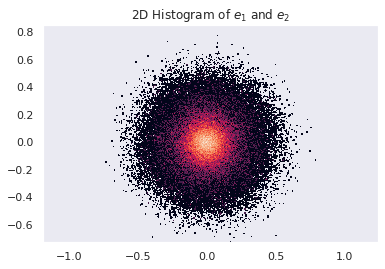

In [7]:
from matplotlib.colors import LogNorm 
plt.hist2d(shapes['All','e1'],shapes['All','e2'],bins=500,norm=LogNorm())
plt.axis('equal')
plt.title("2D Histogram of $e_1$ and $e_2$")
pd.Series(shapes['All','e1']).describe()
pd.Series(shapes['All','e2']).describe()

count    187693.000000
mean          0.810126
std         280.932717
min      -44173.333800
25%          -1.006441
50%           0.000629
75%           0.999558
max       67310.028672
dtype: float64

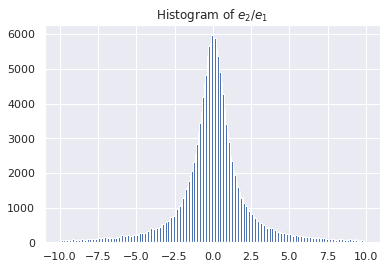

In [8]:
#statistics and hisgoram of e2/e1
plt.hist(shapes['All','e2']/shapes['All','e1'],bins=np.arange(-10,10,0.1))
plt.title("Histogram of $e_2$/$e_1$")
pd.Series(shapes['All','e2']/shapes['All','e1']).describe()

# Get phi 

In [9]:
def get_std_err_of_mean(np_array):
    mean=np_array.mean()
    std=np_array.std()
    n=len(np_array)
    return(std/np.sqrt(n))

In [10]:
phi_1d=shapes[('All','phi')]

## Stats for unweighted

In [11]:
pd.Series(phi_1d).describe()
print("Mean:{:05e} \nStdE:{:05e} ".format(phi_1d.mean(),phi_1d.std()/np.sqrt(len(phi_1d))))

Mean:4.500575e+01 
StdE:6.003916e-02 


count    187693.000000
mean         45.005746
std          26.011097
min           0.001093
25%          22.489422
50%          44.972885
75%          67.561792
max          89.999862
Name: (All, phi), dtype: float64

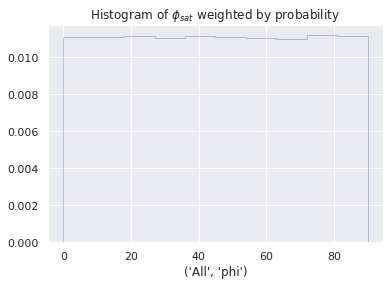

In [12]:
ax = sns.distplot(shapes[('All','phi')],bins=10,kde=False,norm_hist=True, 
                  hist_kws={"histtype": "step"})
ax.set_title("Histogram of $\phi_{sat}$ weighted by probability") 
pd.Series(phi_1d).describe()

# Get e

## Statistics of e1 and e2

In [13]:
e1=shapes[('All','e1')].to_numpy()
shapes[('All','e1')].describe()

count    187693.000000
mean          0.000233
std           0.147565
min          -0.733436
25%          -0.080044
50%          -0.000124
75%           0.080632
max           0.789564
Name: (All, e1), dtype: float64

In [14]:
e2=shapes[('All','e1')].to_numpy()
shapes[('All','e2')].describe()

count    187693.000000
mean         -0.000250
std           0.148246
min          -0.728444
25%          -0.081355
50%          -0.000150
75%           0.080657
max           0.852003
Name: (All, e2), dtype: float64

In [15]:
# np.save("/home/cz136/project/sa/data/{}/e_array".format(dir_string),e_list)

In [16]:
e_p_1d=shapes[('All','ep')]
e_x_1d=shapes[('All','ex')]

mean=8.722206e-06, std_mean=3.408366e-04


count    187693.000000
mean          0.000009
std           0.147663
min          -0.715431
25%          -0.080589
50%          -0.000182
75%           0.080895
max           0.792175
Name: (All, ep), dtype: float64

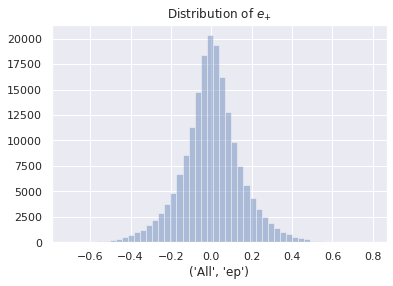

In [17]:
ax=sns.distplot(e_p_1d,kde=False)
ax.set_title("Distribution of $e_{+}$")
print ("mean={:05e}, std_mean={:05e}".format(e_p_1d.mean(),get_std_err_of_mean(e_p_1d)))
pd.Series(e_p_1d).describe()

mean=-8.226664e-05, std_mean=3.419598e-04


count    187693.000000
mean         -0.000082
std           0.148149
min          -0.736318
25%          -0.080948
50%          -0.000561
75%           0.080329
max           0.795489
Name: (All, ex), dtype: float64

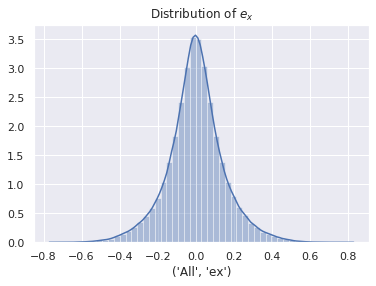

In [18]:
ax=sns.distplot(e_x_1d)
ax.set_title("Distribution of $e_{x}$")
print ("mean={:05e}, std_mean={:05e}".format(e_x_1d.mean(),get_std_err_of_mean(e_x_1d)))
pd.Series(e_x_1d).describe()